# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: *return customer which free-tier will convert to paying customers*

#### 2. What are the predictors/covariates? 

Answer: *During sign-up (age, gender, location, and profession) and customer useage(days since last log in and score 1 = active user, 0= inactive user)*

#### 3. What timeframe is this data relevent for?

Answer: Until all the predicators haven't change their repsentation.  

#### 4. What is the hypothesis?

Answer: Hypothesis is trying to create a model that is more similar to the true model, that is predicting candidates whether admitted or not with the predicators *gpa*, *gre* and *prestige* university rank features.

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit       400 non-null  | 0 = not admit 1 = admit | binary
gre         398 non-null float64 | gre score in units float | continuous
gpa         398 non-null float64 | gpa score in units float | continuous
prestige         398 non-null float64 |        rank of 1 to 4 prestige university | categorical 


We would like to explore the association between X and Y :

**X**: Predicators(gre, gpa, prestige) or independent variables <br>
**Y**: Outcome or dependent variables; making prediction of admit feature col based on the predicators 

#### 2. What is the outcome?

Answer: *Outcome is whether the student will admit or not admit to UCLA.*

#### 3. What are the predictors/covariates? 

Answer:*gre, gpa, prestige are the 3 predictors or independent variables*

#### 4. What timeframe is this data relevent for?

Answer: *This Data is relevant until all predictors didn't change their representations*

#### 4. What is the hypothesis?

Answer: *Hypothesis is trying to create a model that is more similar to the true model, that is predicting candidates whether admitted or not with the given predicators gpa, gre and prestige university rank features*

    Using the above information, write a well-formed problem statement.


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

In [21]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [22]:
# Importing admission.csv data in to dataframe
admit_df = pd.read_csv('admissions.csv')
admit_df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


From this dataset we have four(4) features or columns. We can differentiate in to two groups. The First group is independent variables the second group is dependent variables. 
In this case **admit** is dependent feature, while **gre**, **gpa**, **prestige** are independent features. <br>

First we can look at the characteristics of the features of the admissions dataset.

In [23]:
admit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [24]:
admit_df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [25]:
admit_df.kurtosis()

admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

In [26]:
admit_df.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

In [30]:
#sns.distplot(admit_df.gre)

(array([ 273.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  127.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

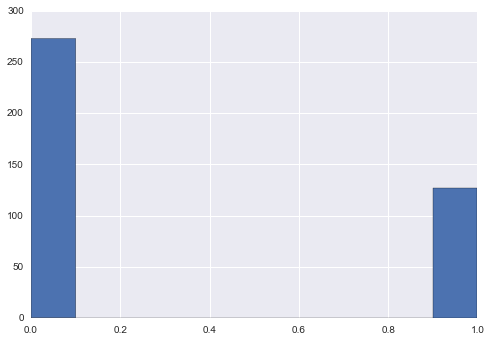

In [7]:
plt.hist(admit_df.admit)

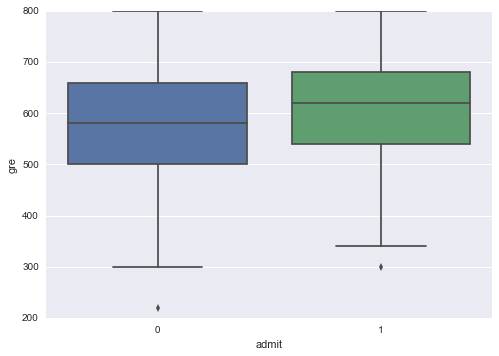

In [8]:
sns.boxplot(data = admit_df, x='admit', y='gre')

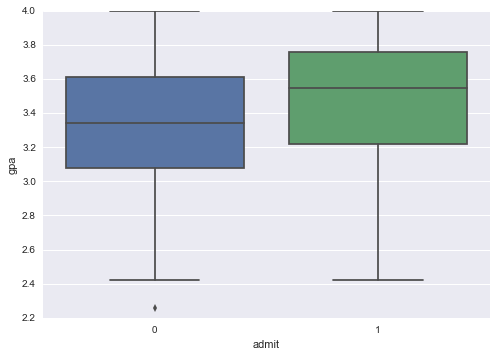

In [9]:
sns.boxplot(data = admit_df, x='admit', y='gpa')

**Using the above boxplot figure, we can figure out the interquartile range of our predictors of *gpa* and *gre* and this helps to figure out of the outliers of the data in those predictors.**

In [10]:
admit_df[['gre', 'gpa']].corr()

,gre,gpa
gre,1.000000,0.382408
gpa,0.382408,1.000000


In [31]:
pd.crosstab(admit_df.admit, admit_df.prestige, rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,97,93,55
1,33,53,28,12


admit       0
gre         2
gpa         2
prestige    1
dtype: int64


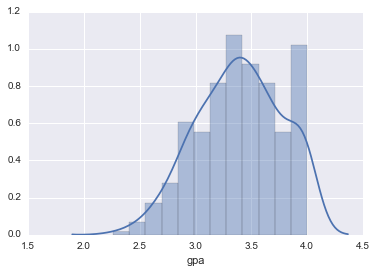

In [40]:
print admit_df.isnull().sum()
df_gpa = admit_df['gpa'].dropna()
df_gpa
sns.distplot(df_gpa)

print "skew:", df_gre.skew()
print "kurtosis:", df_gre.kurtosis()
print "mean gre:", df_gre.mean()
print "median:", df_gre.median()

count 398
skew: -0.150126665946
kurtosis: -0.330065338167
mean gre: 588.040201005
median: 580.0


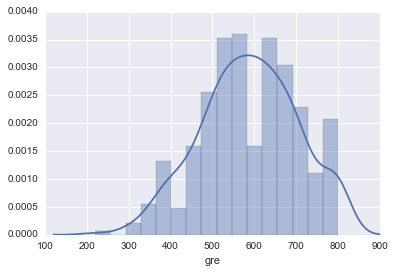

In [56]:
df_gre = admit_df.gre.dropna()
print "count", df_gre.count()
sns.distplot(df_gre)

print "skew:", df_gre.skew()
print "kurtosis:", df_gre.kurtosis()
print "mean gre:", df_gre.mean()
print "median:", df_gre.median()

#### 1. What are the goals of the exploratory analysis? 

Answer: 1. *The goals of exploratory analysis is to analyze the dataset and to summarize their main characteristics with the visual forms. What the data can tell us before our formal modelling or hypothesis testing task*

#### 2a. What are the assumptions of the distribution of data? 

Answer: When the data itself follows as a uni-model bell shaped curve, that is symmetric about its mean.

#### 2b. How will determine the distribution of your data? 

Answer: By calculating the kurtosis and skewness of the data. Skewness measures asymmetry in data, while kurtosis measures how the bulge or peak the data of distribution of curve.

#### 3a. How might outliers impact your analysis? 

Answer: Outliers will greatly affect our model, so have to extra be-careful especially when we are dealing with outliers. There are different techniques how to deal with outliers; whether to drop it or to fill with some normally distributed data. 

#### 3b. How will you test for outliers? 

Answer:By using visualizing the predictors using visualization tools like boxplot, will tell you the outliers.

#### 4a. What is colinearity? 

Answer: Colinearity is when there is high correlations between the predictor features. That is one predicated can linearly predicated from the other predicator feature with degree of accuracy.

#### 4b. How will you test for colinearity? 

Answer: By calculating the correlation function between the two features. 

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: *Trying to look the features that mainly affects the outcome of our predictions and make sure all the features didn't change their representations.*

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model